In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import matplotlib.pyplot as plt
from skimage import io, viewer
import random

plt.style.use('seaborn')

# fix random seed for reproducibility
np.random.seed(7)

train_path = 'C:\\Users\\Louie\\Data\\Springboard_Cap2\\Train2\\'
test_path = 'C:\\Users\\Louie\\Data\\Springboard_Cap2\\Test2\\'
prediction_path = 'C:\\Users\\Louie\\Data\\Springboard_Cap2\\Predictions\\'

Using TensorFlow backend.
C:\Users\Louie\Anaconda3\envs\deeplearning\lib\site-packages\skimage\viewer\utils\core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


### Aggregate Data

In [52]:
import os

train_files = []
test_files = []

for index, file in enumerate(os.listdir(os.fsencode(train_path))):
    train_files.append(str(os.fsdecode(file)))

for index, file in enumerate(os.listdir(os.fsencode(test_path))):
    test_files.append(str(os.fsdecode(file)))

C:\Users\Louie\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The Windows bytes API has been deprecated, use Unicode filenames instead
  
C:\Users\Louie\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: The Windows bytes API has been deprecated, use Unicode filenames instead
  if __name__ == '__main__':


### Validate Image Dimensions

In [5]:
df = pd.read_csv(train_path + random.choice(train_files), index_col=0)
test_img = df.iloc[0,:-1]
viewer.ImageViewer(test_img.values.reshape(86, 154)).show()

[]

### Build Basic Model

In [13]:
model = Sequential()
model.add(Conv2D(7, kernel_size=3, activation='relu', input_shape=(86, 154, 1)))
model.add(Conv2D(3, kernel_size=5, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Helper Functions

In [4]:
def custom_encoder(label):
    if label == 0:
        return np.array([1,0,0])
    elif label == 1:
        return np.array([0,1,0])
    else:
        return np.array([0,0,1])

In [16]:
def train_models(model, train_path, train_files):
    df = pd.read_csv(train_path + random.choice(train_files), index_col=0)
    df = df.sample(frac=.1)
    data = df.iloc[:,:-1].values.reshape(-1, 86, 154, 1)
    labels = np.concatenate(df['13244'].astype(int).apply(custom_encoder).values).reshape(-1,3)
    model.train_on_batch(data, labels)

In [20]:
perf = []

def test_models(model, test_path, test_files, perf):
    df = pd.read_csv(test_path + random.choice(test_files), index_col=0).sample(frac=0.5)
    data = df.iloc[:,:-1].values.reshape(-1, 86, 154, 1)
    labels = np.concatenate(df['13244'].astype(int).apply(custom_encoder).values).reshape(-1,3)
    score = model.test_on_batch(data, labels)
    perf.append(score[1])

### Train over ~150 data run throughs

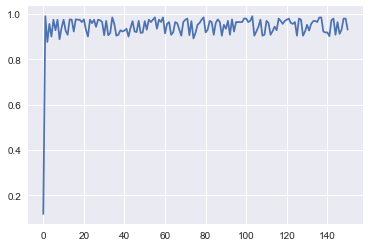

In [25]:
epochs = 150
file_count = 20
frac = 10

for index in range(epochs * file_count * frac):
    train_models(model, train_path, train_files)
    
    if (index + 1) % (file_count * frac) == 0:
        test_models(model, test_path, test_files, perf)

_ = plt.plot(perf)

In [26]:
model.save('cnn.h5')

In [27]:
max(perf)

0.9897959

In [30]:
sum(perf[-100:]) / 100

0.9497820419073105

### Collect Model Predictions

In [56]:
#Write predictions to output file for analysis of model

for file in test_files:
    print(file)
    df = pd.read_csv(test_path + file, index_col=0)
    data = df.iloc[:,:-1].values.reshape(-1, 86, 154, 1)
    labels = df['13244'].astype(int).values
    predictions = np.argmax(model.predict(data), axis=1)
    
    output = pd.DataFrame({'labels':labels,'predictions':predictions})
    
    with open(prediction_path+'predictions.csv', 'a') as f: 
        output.to_csv(f, index=False, header=False)

for file in train_files:
    print(file)
    df = pd.read_csv(train_path + file, index_col=0)
    data = df.iloc[:,:-1].values.reshape(-1, 86, 154, 1)
    labels = df['13244'].astype(int).values
    predictions = np.argmax(model.predict(data), axis=1)
    
    output = pd.DataFrame({'labels':labels,'predictions':predictions})
    
    with open(prediction_path + 'predictions.csv', 'a') as f: 
        output.to_csv(f, index=False, header=False)

Data229.csv
Data239.csv
Data249.csv
Data250.csv
Data1.csv
Data109.csv
Data119.csv
Data129.csv
Data139.csv
Data149.csv
Data159.csv
Data169.csv
Data179.csv
Data189.csv
Data19.csv
Data199.csv
Data209.csv
Data219.csv
Data29.csv
Data39.csv
Data49.csv
Data59.csv
Data69.csv
Data79.csv
Data89.csv
Data9.csv
Data99.csv


### Evaluate Model Performance

In [2]:
predicts = pd.read_csv(prediction_path + 'predictions.csv')
predicts.head()

,labels,predictions
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0


In [6]:
#Accuracy over all data
(predicts['predictions'] == predicts['labels']).mean() * 100

99.2360750574798

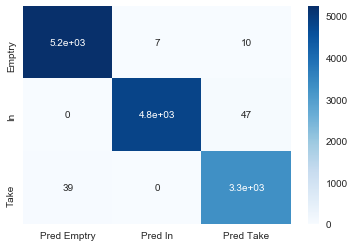

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Confusion Matrix

conf_matrix = confusion_matrix(predicts['labels'], predicts['predictions'])
ax = sns.heatmap(conf_matrix, cmap='Blues', annot=True, xticklabels=['Pred Emptry', 'Pred In', 'Pred Take'], 
                 yticklabels=['Emptry', 'In', 'Take'])